# CS 109A/AC 209A/STAT 121A Data Science: Final Project
**Harvard University**<br>
**Fall 2016**<br>
**Instructors:** W. Pan, P. Protopapas, K. Rader<br>
**Members: ** Shawn Pan, Xinyuan (Amy) Wang, Ming-long Wu

## Remark ##

- Do encoding for 'holiday' and 'weekend'
- Add two new predictors together with their corresponding price to the data
- Now, we have (listings + calendar) altogether for data
- OLS from the new model gets R^2 of about 0.66
- Shows that log(price) is still the key factor


In [1]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
import statsmodels.api as sm
from itertools import combinations
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from collections import Counter
import sys
%matplotlib inline

In [2]:
#read the data
df = pd.read_csv('listings_clean.csv')
print(df.columns.values)
df.head()

['id' 'host_since' 'zipcode' 'latitude' 'longitude' 'property_type'
 'room_type' 'accommodates' 'bathrooms' 'bedrooms' 'beds' 'bed_type'
 'guests_included' 'minimum_nights' 'maximum_nights' 'availability_30'
 'availability_60' 'availability_90' 'availability_365' 'number_of_reviews'
 'first_review' 'last_review' 'review_scores_rating'
 'review_scores_accuracy' 'review_scores_cleanliness'
 'review_scores_checkin' 'review_scores_communication'
 'review_scores_location' 'review_scores_value' 'host_listing_count'
 'price']


,id,host_since,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count,price
0,1069266,1926,10022.0,40.756852,-73.964754,0,0,2,1.0,1.0,...,2542.0,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1,160
1,1846722,1625,NaN,40.830599,-73.941014,0,0,10,1.0,3.0,...,2554.0,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2,105
2,2061725,1831,11221.0,40.692189,-73.924120,0,1,2,1.0,1.0,...,2554.0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4,58
3,44974,953,10011.0,40.734751,-74.002592,0,0,2,1.0,1.0,...,2494.0,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1,185
4,4701675,2479,10011.0,40.745282,-73.997836,0,0,2,1.0,1.0,...,2533.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,195


In [3]:
df.shape

(27392, 31)

In [4]:
##Added Calendar Information to OLS model
#read calendar data
data = pd.read_csv("calendar_grid.csv")
print data.shape
data.head(n=20)

(27392, 366)


,listing_id,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,...,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31
0,3604481,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,...,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0
1,2949128,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,4325397,100.0,100.0,100.0,100.0,100.0,70.0,70.0,70.0,80.0,...,70.0,70.0,70.0,80.0,80.0,70.0,70.0,70.0,70.0,70.0
3,4325398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,275.0,275.0,275.0,275.0,275.0,275.0,275.0,275.0,275.0,275.0
4,3426149,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,NaN,...,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0
5,65562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0
6,2730672,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0
7,4587554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0
8,819206,NaN,NaN,NaN,70.0,70.0,70.0,70.0,70.0,70.0,...,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
9,4849703,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#adding 2 binary indicator variable columns and duplicating the listing data 4 times for each combination.
#2015.7.4 is Saturday
#So we need to extract: 
    #                                       Holiday     Weekend
    #        7.4                             yes          yes
    #  1.1, 11.26, 12.25                     yes          no
    #   all weekends-7.4                     no           yes
    #   all weekdays- 1.1, 11.26, 12.25      no           no
    
#holiday indices
holiday_dates = ['01-01', '07-04', '11-26', '12-25']
holiday_index = [data.columns.get_loc(x) for x in holiday_dates]

weekend_holiday_index = [i for i in range(1, 366) if (i % 7 == 3 or i % 7 == 4) and (i in holiday_index)]
weekend_nonholiday_index = [i for i in range(1, 366) if (i % 7 == 3 or i % 7 == 4) and (i not in holiday_index)]
weekday_holiday_index = [i for i in range(1, 366) if (i % 7 < 3 or i % 7 > 4) and (i in holiday_index)]
weekday_nonholiday_index = [i for i in range(1, 366) if (i % 7 < 3 or i % 7 > 4) and (i not in holiday_index)]


#get averages
weekend_holidays = data.values[:, weekend_holiday_index]
weekend_nonholidays = data.values[:, weekend_nonholiday_index]
weekday_holidays = data.values[:, weekday_holiday_index]
weekday_nonholidays = data.values[:, weekday_nonholiday_index]

weekend_holiday_prices = np.nanmean(weekend_holidays, axis=1)
weekend_nonholiday_prices = np.nanmean(weekend_nonholidays, axis=1)
weekday_holiday_prices = np.nanmean(weekday_holidays, axis=1)
weekday_nonholiday_prices = np.nanmean(weekday_nonholidays, axis=1)

/usr/lib/python2.7/dist-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [6]:
print weekend_holiday_prices.shape
print weekend_nonholiday_prices.shape
print weekday_holiday_prices.shape
print weekday_nonholiday_prices.shape

(27392,)
(27392,)
(27392,)
(27392,)


In [7]:
#Modify df using calendar infos
print df.shape
features = np.append(df.columns.values, ['weekend', 'holiday'])
new_df = pd.DataFrame(np.zeros((df.shape[0]*4, df.shape[1]+2)), columns=features)
print new_df.shape

(27392, 31)
(109568, 33)


In [8]:
#now append items
#duplicate each original entry for four times

for i in range(df.shape[0]):
    #find the index in calendar file
    #duplicate four times and append to new_df    
    item = df.iloc[i].copy()
    item['weekend']=1

    item['holiday']=1
    item['price']=weekend_holiday_prices[data[data['listing_id']==df.iloc[i]['id']].index.tolist()[0]]
    new_df.iloc[i*4]=item
    item['holiday']=0
    item['price']=weekend_nonholiday_prices[data[data['listing_id']==df.iloc[i]['id']].index.tolist()[0]]
    new_df.iloc[i*4+1]=item

    item['weekend']=0

    item['holiday']=1
    item['price']=weekday_holiday_prices[data[data['listing_id']==df.iloc[i]['id']].index.tolist()[0]]
    new_df.iloc[i*4+2]=item
    item['holiday']=0
    item['price']=weekday_nonholiday_prices[data[data['listing_id']==df.iloc[i]['id']].index.tolist()[0]]
    new_df.iloc[i*4+3]=item
    
    sys.stdout.write("\r{0}% completed".format((float(i+1)/df.shape[0])*100))
    sys.stdout.flush()

100.0% completed

In [10]:
new_df

,id,host_since,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count,price,weekend,holiday
0,1069266.0,1926.0,10022.0,40.756852,-73.964754,0.0,0.0,2.0,1.0,1.0,...,9.0,7.0,9.0,9.0,10.0,9.0,1.0,160.000000,1.0,1.0
1,1069266.0,1926.0,10022.0,40.756852,-73.964754,0.0,0.0,2.0,1.0,1.0,...,9.0,7.0,9.0,9.0,10.0,9.0,1.0,160.000000,1.0,0.0
2,1069266.0,1926.0,10022.0,40.756852,-73.964754,0.0,0.0,2.0,1.0,1.0,...,9.0,7.0,9.0,9.0,10.0,9.0,1.0,160.000000,0.0,1.0
3,1069266.0,1926.0,10022.0,40.756852,-73.964754,0.0,0.0,2.0,1.0,1.0,...,9.0,7.0,9.0,9.0,10.0,9.0,1.0,160.000000,0.0,0.0
4,1846722.0,1625.0,NaN,40.830599,-73.941014,0.0,0.0,10.0,1.0,3.0,...,8.0,8.0,9.0,8.0,7.0,8.0,2.0,110.000000,1.0,1.0
5,1846722.0,1625.0,NaN,40.830599,-73.941014,0.0,0.0,10.0,1.0,3.0,...,8.0,8.0,9.0,8.0,7.0,8.0,2.0,107.474227,1.0,0.0
6,1846722.0,1625.0,NaN,40.830599,-73.941014,0.0,0.0,10.0,1.0,3.0,...,8.0,8.0,9.0,8.0,7.0,8.0,2.0,108.333333,0.0,1.0
7,1846722.0,1625.0,NaN,40.830599,-73.941014,0.0,0.0,10.0,1.0,3.0,...,8.0,8.0,9.0,8.0,7.0,8.0,2.0,106.133603,0.0,0.0
8,2061725.0,1831.0,11221.0,40.692189,-73.924120,0.0,1.0,2.0,1.0,1.0,...,10.0,10.0,10.0,10.0,9.0,10.0,4.0,NaN,1.0,1.0
9,2061725.0,1831.0,11221.0,40.692189,-73.924120,0.0,1.0,2.0,1.0,1.0,...,10.0,10.0,10.0,10.0,9.0,10.0,4.0,67.525424,1.0,0.0


In [11]:
#save dataframe to csv to avoid running table join again
new_df.to_csv("data_with_calendar.csv", index=False, index_label=False)

In [12]:
#read from csv
new_df = pd.read_csv("data_with_calendar.csv")
new_df.shape

(109568, 33)

In [13]:
# remove small zipcode clusters, with 95% data left
# count each zipcode entries
nb_counts = Counter(new_df['zipcode'])
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
# select clusters with size >= 50
tdf1 = tdf[tdf.values>=50*4]
print 'Remaining data proportion: ' + str(float(sum(tdf1.values))/new_df.shape[0])
# get zipcode clusters
zipcode_included = tdf1.index

new_df1 = new_df.loc[new_df['zipcode'].isin(zipcode_included)]
print new_df1.shape

Remaining data proportion: 0.94976635514
(104064, 33)


In [14]:
#remove items that price doesn't exist
new_df2 = new_df1[~np.isnan(new_df1['price'])]

print 'Remaining data proportion: ' + str(float(new_df2.shape[0])/new_df.shape[0])
print new_df2.shape

Remaining data proportion: 0.847136025117
(92819, 33)


In [15]:
new_y = new_df2['price']

In [16]:
#Feature Extraction:
#Use the features we decided last time
features = ['zipcode', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 
            'bathrooms', 'bedrooms', 'beds', 'bed_type', 'number_of_reviews', 'review_scores_rating',
            'review_scores_accuracy', 'review_scores_cleanliness', 
            'review_scores_checkin', 'review_scores_communication', 
            'review_scores_location', 'review_scores_value', 'host_listing_count', 'weekend', 'holiday']

new_df_x = new_df2[features]
new_df_x.head()

,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count,weekend,holiday
0,10022.0,40.756852,-73.964754,0.0,0.0,2.0,1.0,1.0,1.0,0.0,...,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1.0,1.0,1.0
1,10022.0,40.756852,-73.964754,0.0,0.0,2.0,1.0,1.0,1.0,0.0,...,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1.0,1.0,0.0
2,10022.0,40.756852,-73.964754,0.0,0.0,2.0,1.0,1.0,1.0,0.0,...,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1.0,0.0,1.0
3,10022.0,40.756852,-73.964754,0.0,0.0,2.0,1.0,1.0,1.0,0.0,...,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1.0,0.0,0.0
9,11221.0,40.692189,-73.924120,0.0,1.0,2.0,1.0,1.0,2.0,0.0,...,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4.0,1.0,0.0


In [17]:
#categorical and numerical column names
cate = ['zipcode', 'property_type', 'room_type', 'bed_type', 'weekend', 'holiday']
nume = [c for c in new_df_x.columns.values if c not in cate]

#fill categorical with mode, numerical with mean
new_df_x_cate = new_df_x[cate].apply(lambda x:x.fillna(x.value_counts().index[0]))
new_df_x_nume = new_df_x[nume].apply(lambda x:x.fillna(x.mean()))

new_df_x = pd.concat([new_df_x_cate, new_df_x_nume], axis=1)
new_df_x.head()

,zipcode,property_type,room_type,bed_type,weekend,holiday,latitude,longitude,accommodates,bathrooms,...,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count
0,10022.0,0.0,0.0,0.0,1.0,1.0,40.756852,-73.964754,2.0,1.0,...,1.0,62.0,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1.0
1,10022.0,0.0,0.0,0.0,1.0,0.0,40.756852,-73.964754,2.0,1.0,...,1.0,62.0,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1.0
2,10022.0,0.0,0.0,0.0,0.0,1.0,40.756852,-73.964754,2.0,1.0,...,1.0,62.0,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1.0
3,10022.0,0.0,0.0,0.0,0.0,0.0,40.756852,-73.964754,2.0,1.0,...,1.0,62.0,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1.0
9,11221.0,0.0,1.0,0.0,1.0,0.0,40.692189,-73.924120,2.0,1.0,...,2.0,35.0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4.0


In [18]:
# Get numpy array from data
new_x = new_df_x.values

# Apply one hot endcoing
categorical = [(c in cate) for c in new_df_x.columns]
encoder = preprocessing.OneHotEncoder(categorical_features=categorical, sparse=False)  

new_x = encoder.fit_transform(new_x)

print new_x.shape
print new_y.shape

(92819, 107)
(92819,)


In [19]:

x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.3, random_state=0)
print 'train data: ', x_train.shape
print 'test data: ', x_test.shape
#OLS
X = sm.add_constant(x_train)
model = sm.OLS(y_train,X)
results = model.fit()
print results.summary()

train data:  (64973, 107)
test data:  (27846, 107)
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     265.7
Date:                Wed, 07 Dec 2016   Prob (F-statistic):               0.00
Time:                        11:52:44   Log-Likelihood:            -4.4000e+05
No. Observations:               64973   AIC:                         8.802e+05
Df Residuals:                   64871   BIC:                         8.811e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
c

In [20]:
#same OLS model with sklearn (easier to score but less detailed output)
model = LinearRegression()
model.fit(x_train, y_train)
print "Train Score", model.score(x_train, y_train)
print "Test Score", model.score(x_test, y_test)

Train Score 0.292611234187
Test Score 0.299388989499


In [21]:
#try several random seeds to check for stability and variance
for r in range(10):
    x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.3, random_state=r)
    model = LinearRegression()
    model.fit(x_train, y_train)
    print "Train {:.3f} Test {:.3f}".format(model.score(x_train, y_train), model.score(x_test, y_test))

Train 0.293 Test 0.299
Train 0.288 Test 0.312
Train 0.296 Test 0.291
Train 0.282 Test 0.327
Train 0.288 Test 0.311
Train 0.294 Test 0.295
Train 0.295 Test 0.291
Train 0.297 Test 0.289
Train 0.290 Test 0.306
Train 0.294 Test 0.296


We could see that after encoding the calendar information, we now could get a similar score of about 0.3 with OLS.

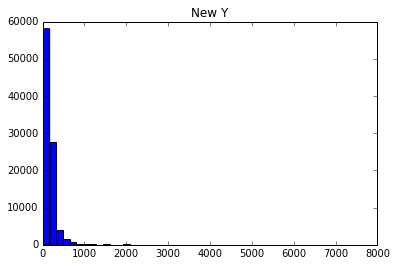

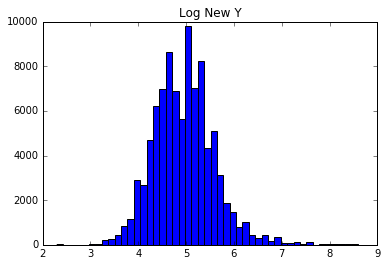

In [22]:
plt.figure()
plt.hist(new_y, bins=50)
plt.title("New Y");
plt.figure()
plt.hist(np.log(new_y), bins=50)
plt.title("Log New Y");

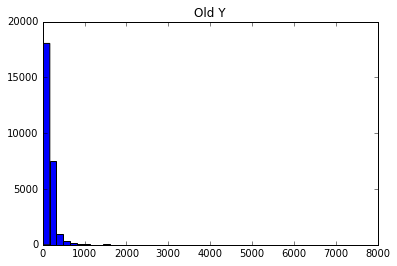

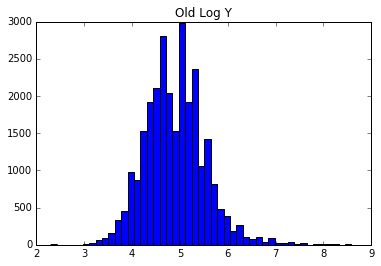

In [24]:
plt.figure()
plt.hist(df["price"], bins=50)
plt.title("Old Y");
plt.figure()
plt.hist(np.log(df["price"]), bins=50)
plt.title("Old Log Y")

In [25]:
#try log transform on prices
new_y_log = np.log(new_y)
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y_log, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)
print "Train Score", model.score(x_train, y_train)
print "Test Score", model.score(x_test, y_test)

Train Score 0.676664337563
Test Score 0.681970538245


In [26]:
for r in range(10):
    x_train, x_test, y_train, y_test = train_test_split(new_x, new_y_log, test_size=0.3, random_state=r)
    model = LinearRegression()
    model.fit(x_train, y_train)
    print "Train {:.3f} Test {:.3f}".format(model.score(x_train, y_train), model.score(x_test, y_test))

Train 0.677 Test 0.682
Train 0.677 Test 0.683
Train 0.678 Test 0.678
Train 0.675 Test 0.686
Train 0.678 Test 0.678
Train 0.680 Test 0.675
Train 0.681 Test 0.673
Train 0.677 Test 0.680
Train 0.677 Test 0.681
Train 0.678 Test 0.678


The model score goes up to 0.68 after applying log transform on prices.